# Tutorial 5: RFE on all features

---

### Introduction

Hello, this notebook will show how to use RFE to perform further feature selection, as we found that most features are very highly correlated, therfore we would need to remove those using the tool that we mentioned above. 

In [14]:
print(1)

1


first, let us call the data

In [1]:
%store -r df_input_RG
%store -r y_RG
%store -r df_RG

In [2]:
y_RG = y_RG.map({'S': 1, 'B': 0})

---

calling some packages

In [3]:
# Python packages 
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import numpy as np
import matplotlib.pyplot as plt

---

<b><i> Data splitting </i></b> 

In [4]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest  = train_test_split( df_input_RG, y_RG, test_size = 0.3, random_state=3, stratify=y_RG) # train and valid sets



In [5]:
print(Xtrain.shape)
print(Xtest.shape)

(393, 2074)
(169, 2074)


---

<b><i> get the best N features </i></b> 

In [6]:
%store -r featImp_RG

In [7]:
arrimp = np.array(featImp_RG).mean(0)
sorted_idx = arrimp.argsort()
print(sorted_idx[-10:])

[1316 1284 1093 1290   60 1034 1068 1029 1070 1107]


In [8]:
# cols_ordered = df_input_RG.columns[sorted_idx][-400:]
cols_ordered = df_input_RG.columns[sorted_idx]

cols_ordered

Index([1924.752, 1979.115, 1892.438, 1919.053,  1961.15, 1916.216,  2031.85,
       1670.516, 1962.635,  2233.11,
       ...
       1445.173, 1419.847, 1285.394, 1424.528,  850.046, 1248.864, 1269.657,
       1245.863, 1270.902, 1294.379],
      dtype='object', length=2074)

---

In [9]:
Xtrain[cols_ordered]

,1924.752,1979.115,1892.438,1919.053,1961.150,1916.216,2031.850,1670.516,1962.635,2233.110,...,1445.173,1419.847,1285.394,1424.528,850.046,1248.864,1269.657,1245.863,1270.902,1294.379
379,0.607492,0.639892,0.669742,0.606426,0.623367,0.609912,0.695359,0.934048,0.625419,0.800189,...,0.796700,0.816613,0.965266,0.808167,1.052470,0.965650,0.966705,0.965603,0.966063,0.963941
206,-0.366741,-0.381271,-0.389338,-0.362172,-0.375774,-0.367155,-0.394908,-0.474669,-0.375628,-0.390425,...,-0.452495,-0.447041,-0.722030,-0.446465,-0.930544,-0.728422,-0.730134,-0.727560,-0.729684,-0.712608
432,0.875070,0.866409,0.847268,0.873901,0.869145,0.871854,0.859508,0.907873,0.868012,0.866793,...,0.855384,0.838502,0.989786,0.843569,1.155776,0.994813,0.996318,0.993234,0.996334,0.982111
272,1.463718,1.474858,1.489697,1.464768,1.469258,1.466182,1.491474,1.443712,1.469289,1.517638,...,1.492504,1.506321,1.333299,1.500297,1.245707,1.325703,1.327618,1.325240,1.327287,1.338556
321,0.603271,0.637888,0.675640,0.605315,0.622098,0.606359,0.701256,0.986853,0.622743,0.825023,...,0.808170,0.834994,1.028176,0.824187,1.085934,1.028247,1.027980,1.027653,1.028410,1.026382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,-0.469964,-0.516863,-0.532495,-0.470364,-0.496634,-0.471429,-0.571237,-0.784659,-0.497572,-0.641509,...,-0.636559,-0.647769,-0.874418,-0.641312,-0.892337,-0.877430,-0.875470,-0.877618,-0.875385,-0.872381
352,-0.087327,-0.062869,-0.059293,-0.089101,-0.073361,-0.086704,-0.023187,0.358178,-0.072389,0.077632,...,0.045670,0.052283,0.684628,0.046264,0.929434,0.692055,0.693880,0.691212,0.693527,0.671506
451,-1.037310,-1.001957,-0.957197,-1.034526,-1.019600,-1.031439,-0.929954,-0.071891,-1.017910,-0.734374,...,-0.668446,-0.633230,0.522034,-0.647791,0.844424,0.535109,0.536361,0.532918,0.535635,0.504907
416,0.578392,0.609572,0.609261,0.576289,0.595376,0.579430,0.652737,0.843417,0.596561,0.740079,...,0.672878,0.677292,0.960809,0.673813,1.069079,0.963161,0.964591,0.962735,0.964783,0.955840


### RFE

In [10]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression

In [13]:
# https://machinelearningmastery.com/rfe-feature-selection-in-python/
selected = []
imp_ind = []
imp_freq = []

for i in range(1, 51, 1):
    print(i)
    sfs = RFE(estimator=LogisticRegression(solver = 'newton-cg'), n_features_to_select=i)
    # fit sfs
    sfs.fit(Xtrain[cols_ordered].values, Ytrain)
    # summarize all features
    selected_feat = []
    for i in range(Xtrain[cols_ordered].shape[1]):
        if sfs.support_[i] == True:
            selected_feat.append(i)
            print('Column: %d, Selected %s,' % (i, sfs.support_[i]))
        
    # print()
    selected.append(selected_feat)
    
    result = list(set(imp_ind) ^ set(selected[-1]))
    imp_freq.extend(Xtrain[cols_ordered].columns[result])    
    imp_ind.extend(result)    
    
    print(selected[-1])
    print(result)
    print(imp_ind)
    print(imp_freq)
    print()
    
    

1
Column: 1666, Selected True,
[1666]
[1666]
[1666]
[1312.065]

2
Column: 192, Selected True,
Column: 1666, Selected True,
[192, 1666]
[192]
[1666, 192]
[1312.065, 874.121]

3
Column: 192, Selected True,
Column: 1535, Selected True,
Column: 1666, Selected True,
[192, 1535, 1666]
[1535]
[1666, 192, 1535]
[1312.065, 874.121, 1312.729]

4
Column: 192, Selected True,
Column: 1343, Selected True,
Column: 1535, Selected True,
Column: 1666, Selected True,
[192, 1343, 1535, 1666]
[1343]
[1666, 192, 1535, 1343]
[1312.065, 874.121, 1312.729, 873.826]

5
Column: 192, Selected True,
Column: 976, Selected True,
Column: 1343, Selected True,
Column: 1535, Selected True,
Column: 1666, Selected True,
[192, 976, 1343, 1535, 1666]
[976]
[1666, 192, 1535, 1343, 976]
[1312.065, 874.121, 1312.729, 873.826, 1313.394]

6
Column: 192, Selected True,
Column: 697, Selected True,
Column: 976, Selected True,
Column: 1343, Selected True,
Column: 1535, Selected True,
Column: 1666, Selected True,
[192, 697, 976, 1343

---

In [46]:
print(len(selected ))
# selected.append(cols_ordered[-51:])
# selected.append(cols_ordered)

50


### LR

In [50]:
lr = LogisticRegression()

In [51]:
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
lr_par = dict(solver=solvers,penalty=penalty,C=c_values)

In [52]:
models = [[lr, 'lr', 14]]
par = [lr_par]

In [53]:
from source.ml_acc import get_accuracy_ml

In [54]:
num_ml_tools = len(par)
ml_dicts = {}

for m, par in zip(models, par):
    key0 = str(m[1])
    ml_dicts[key0] = {}
    for f in selected:
        print(cols_ordered[f])

        xtr =  Xtrain[cols_ordered].iloc[:, f]
        # xte =  Xtest[cols_ordered].iloc[:, f]
        print(xtr)
        results = get_accuracy_ml (m[0], m[2], par, np.array(xtr), np.array(Ytrain), np.array(xtr), np.array(Ytrain)) # to get the accuracies for the ml model

        key = str(m[1])+","+str(len(f))
        ml_dicts[key0][key] = {}

        ml_dicts[key0][key]['tot_acc'] = results[0]
        ml_dicts[key0][key]['jack_train'] = results[1]
        ml_dicts[key0][key]['jack_test'] = results[2]

Index([1312.065], dtype='object')
     1312.065
379  0.959423
206 -0.679155
432  0.959133
272  1.354477
321  1.026991
..        ...
37  -0.868270
352  0.633577
451  0.448563
416  0.939756
553 -0.376270

[393 rows x 1 columns]
Index([874.121, 1312.065], dtype='object')
      874.121  1312.065
379  1.050553  0.959423
206 -0.938183 -0.679155
432  1.162590  0.959133
272  1.253997  1.354477
321  1.080702  1.026991
..        ...       ...
37  -0.886053 -0.868270
352  0.923548  0.633577
451  0.831965  0.448563
416  1.062970  0.939756
553 -0.376173 -0.376270

[393 rows x 2 columns]
Index([874.121, 1312.729, 1312.065], dtype='object')
      874.121  1312.729  1312.065
379  1.050553  0.959139  0.959423
206 -0.938183 -0.677836 -0.679155
432  1.162590  0.958297  0.959133
272  1.253997  1.355605  1.354477
321  1.080702  1.026940  1.026991
..        ...       ...       ...
37  -0.886053 -0.867759 -0.868270
352  0.923548  0.632145  0.633577
451  0.831965  0.445639  0.448563
416  1.062970  0.938779  0

---

In [61]:
import json

In [62]:
with open('ml_rg_fs.txt', 'w') as file:
     file.write(json.dumps(ml_dicts)) # use `json.loads` to do the reverse

In [63]:
import json
with open('ml_rg_fs.txt') as f:
    data = f.read()
    
ml_dicts = json.loads(data)

with open('base_rg_tr.txt') as f:
    data = f.read()
    
baseDict = json.loads(data)
baseDict['lr'].keys()    

dict_keys(['lr, all'])

In [64]:
print(baseDict['lr'].keys()    )
print(ml_dicts['lr'].keys()    )

dict_keys(['lr, all'])
dict_keys(['lr,1', 'lr,2', 'lr,3', 'lr,4', 'lr,5', 'lr,6', 'lr,7', 'lr,8', 'lr,9', 'lr,10', 'lr,11', 'lr,12', 'lr,13', 'lr,14', 'lr,15', 'lr,16', 'lr,17', 'lr,18', 'lr,19', 'lr,20', 'lr,21', 'lr,22', 'lr,23', 'lr,24', 'lr,25', 'lr,26', 'lr,27', 'lr,28', 'lr,29', 'lr,30', 'lr,31', 'lr,32', 'lr,33', 'lr,34', 'lr,35', 'lr,36', 'lr,37', 'lr,38', 'lr,39', 'lr,40', 'lr,41', 'lr,42', 'lr,43', 'lr,44', 'lr,45', 'lr,46', 'lr,47', 'lr,48', 'lr,49', 'lr,50'])


In [65]:
from source.calculate_jack import jack_SD # importing the baseline code from source.basline file

In [66]:
arr_all = []
for m, d in zip (models, ml_dicts.keys()):
    acc_arr = [] 
    sd_arr = [] 

    # print(ml_dicts[d])
    for key in ml_dicts[d].keys():
        acc_arr.append(ml_dicts[d][key][ 'tot_acc' ]) # append total accuracy to an array
        sd_train = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_train' ]) ), ml_dicts[d][key][ 'jack_train' ])[0]
        sd_test = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_test' ]) ), ml_dicts[d][key][ 'jack_test' ])[0]
        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_arr.append(sd) # append sd_arr to an array
    arr_all.append([ list(ml_dicts[d].keys()), acc_arr, sd_arr])    

In [67]:
print(arr_all[0][1])

[0.5, 0.6717171717171717, 0.6733668341708543, 0.67, 0.6699507389162561, 0.6868686868686869, 0.6862745098039216, 0.7417840375586855, 0.7405660377358491, 0.7440758293838863, 0.7440758293838863, 0.7428571428571429, 0.7428571428571429, 0.7428571428571429, 0.7464114832535885, 0.7655502392344498, 0.7666666666666667, 0.7655502392344498, 0.7655502392344498, 0.7644230769230769, 0.7746478873239436, 0.7746478873239436, 0.7746478873239436, 0.7746478873239436, 0.7746478873239436, 0.7783018867924528, 0.7783018867924528, 0.7783018867924528, 0.7830188679245284, 0.7772511848341233, 0.7731481481481481, 0.7731481481481481, 0.7731481481481481, 0.7731481481481481, 0.7731481481481481, 0.7731481481481481, 0.7793427230046949, 0.7793427230046949, 0.7783018867924528, 0.7783018867924528, 0.7783018867924528, 0.7783018867924528, 0.7793427230046949, 0.7793427230046949, 0.7793427230046949, 0.7793427230046949, 0.7793427230046949, 0.7793427230046949, 0.7714285714285715, 0.7714285714285715]


[0.         0.06122449 0.12244898 0.18367347 0.24489796 0.30612245
 0.36734694 0.42857143 0.48979592 0.55102041 0.6122449  0.67346939
 0.73469388 0.79591837 0.85714286 0.91836735 0.97959184 1.04081633
 1.10204082 1.16326531 1.2244898  1.28571429 1.34693878 1.40816327
 1.46938776 1.53061224 1.59183673 1.65306122 1.71428571 1.7755102
 1.83673469 1.89795918 1.95918367 2.02040816 2.08163265 2.14285714
 2.20408163 2.26530612 2.32653061 2.3877551  2.44897959 2.51020408
 2.57142857 2.63265306 2.69387755 2.75510204 2.81632653 2.87755102
 2.93877551 3.        ]


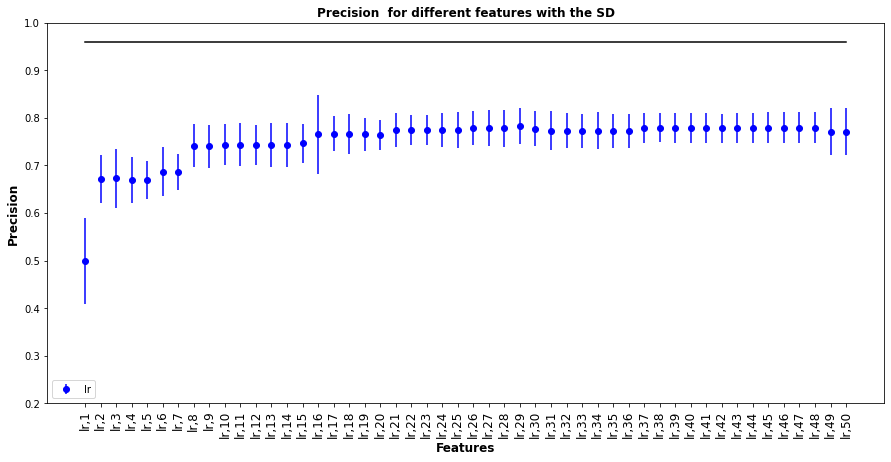

In [68]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  for different features with the SD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-1

space = []
tickFeat = []

for result, model, color in zip(arr_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,50)
    print(a)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1
    
    
plt.plot(np.array(space),[0.95959]*50, color = 'Black')            
plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =12)
plt.ylim(.2, 1)
plt.legend()

plt.show()

In [69]:
# arr_diff_all = []

# for m, m_key in zip (models, ml_dicts.keys()):
#     acc_diff_arr = [] 
#     sd_diff_arr = [] 
#     for f_key in ml_dicts[m_key].keys():
#         value = f_key.split(',')
#         acc_diff_arr.append( ml_dicts[m_key][f_key][ 'tot_acc' ] - baseDict['lr']['lr, all'][ 'tot_acc' ]  )

#         sd_train = jack_SD( baseDict['lr']['lr, all'][ 'jack_train' ], ml_dicts[m_key][f_key]['jack_train'] )[0]
#         # sd_test = jack_SD(  baseDict['lr']['lr, all'][ 'jack_test' ],  ml_dicts[m_key][f_key]['jack_test']   )[0]

#         sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
#         sd_diff_arr.append(sd) # append sd_arr to an array
#     arr_diff_all.append([ list(ml_dicts[m_key].keys()), acc_diff_arr, sd_diff_arr]) 

In [70]:
# colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
# plt.figure(figsize=(15, 7))
# plt.title( "Precision  differences for ML methods versus LR_all for feature setsD", fontweight ='bold', fontsize =12)
# plt.xlabel("Features", fontweight ='bold', fontsize =12)
# plt.ylabel("Precision  difference", fontweight ='bold', fontsize =12)

# count = 0
# n = len(colors)-0.5
# space = []
# tickFeat = []

# for result, model, color in zip(arr_diff_all, models, colors):
#     a = np.linspace(n*count, n*(1+count)-2,50)
#     space.extend(a)
#     tickFeat.extend(result[0])
#     plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
#     count += 1
    
# plt.plot(np.array(space), np.zeros(50*1), color = 'Black')        
# plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =12)
# plt.ylim(-.5, 1)
# plt.legend()

# plt.show()

In [71]:


RFE_wave = [1313.394, 874.121, 1314.06, 873.826, 1314.726, 1503.852, 874.415, 1312.729, 1312.065, 874.71, 1311.401, 875.892, 1310.738, 875.005, 1509.104, 1310.076, 1309.415, 875.596, 1308.754, 875.3, 1316.73, 1504.725, 1308.093, 882.151, 1315.393, 1316.061, 1502.98, 2480.996, 1509.983, 894.014, 1307.433, 893.706, 1306.774, 1508.226, 1306.116, 898.662, 1301.526, 904.936, 1317.399, 1497.77, 1920.475, 1510.863, 1300.873, 904.62, 1302.18, 898.974, 1507.349, 1305.458, 1302.834, 1498.636]


[1312.065, 874.121, 1312.729, 873.826, 1313.394, 882.151, 1314.06, 1503.852, 1311.401, 894.322]
[1310.738, 894.014, 1308.754, 1309.415, 898.662, 1509.104, 1308.093, 900.535, 1310.076, 1502.98]
[2480.996, 1508.226, 1307.433, 900.848, 1306.774, 900.222, 1306.116, 1509.983, 1301.526, 904.936]
[1300.873, 899.91, 1507.349, 1302.18, 904.62, 1314.726, 2483.372, 1506.473, 1300.221, 904.305]


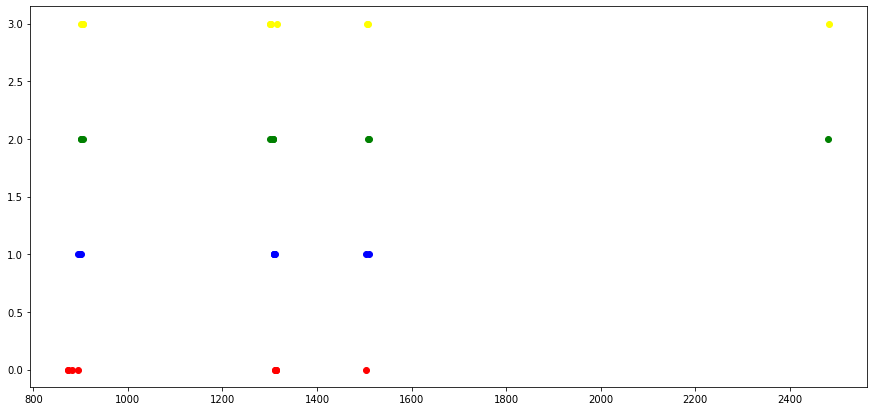

In [73]:
plt.rcParams["figure.figsize"] = (15,7)# 'xtick.labelsize', 'ytick.labelsize'
# plt.rcParams['ytick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
# plt.rcParams['xtick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
# plt.rcParams['axes.labelsize'] = 15
# plt.rcParams['axes.titlesize'] = 15
arrr= [0, 10, 20, 30, 40]
colrs = ['red', 'blue', 'green', 'yellow']
for i in range (4):
    
    print(imp_freq[arrr[i]:arrr[i+1]])
                   
    plt.scatter(imp_freq[arrr[i]:arrr[i+1]], np.zeros(10)+i, color = colrs[i])
plt.show()